# **Fashion MNIST Classifier**
## 1. Objective
The goal of this project is to build a neural network model to classify grayscale clothing images into 10 categories (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot).

This demonstrates the use of Artificial Neural Networks (ANNs) for image classification tasks.

## 2. Dataset

Fashion MNIST dataset (by Zalando), available in Keras.

60,000 training images and 10,000 test images, each of size 28×28 pixels.

Categories include shirts, trousers, coats, sneakers, etc.

Dataset is balanced across all classes.

# 3. Tools Used

TensorFlow / Keras → Model building and training.

Matplotlib & Seaborn → Visualization of accuracy/loss and confusion matrix.

Scikit-learn → Classification report and metrics.

Google Colab → Execution environment (with GPU).

#Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**TensorFlow & Keras** → build and train the neural network.

**Matplotlib & Seaborn** → visualize graphs and confusion matrix.

**Sklearn** → generate evaluation metrics like precision, recall, and F1-score.

# Step 2: Loading Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Here we are using **the Fashion MNIST** dataset from Keras.

Contains **60,000** training images and **10,000** test images.

Each image is **28x28** grayscale, representing clothes like shoes, shirts, coats, bags.

**class_names** list will help us display readable labels instead of numbers

# Step 3: Preprocessing

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Images are **normalized** (pixel values scaled from 0–255 → 0–1) for faster training.

Labels are converted into **one-hot encoding** (e.g., Dress → [0,0,0,1,0,0,0,0,0,0]).

# Step 4: Building Model

In [ ]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28,28)),     # define input explicitly
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


### **Model Architecture Explanation:**

- Input layer defines the image size **(28×28)**.

- Flatten layer reshapes the image into a vector of **784 features**.

-  Dense(128, ReLU): **learns patterns** from the image.

-  Dropout(0.3): **prevents overfitting** by randomly deactivating neurons.

- Dense(64, ReLU): **adds more depth** to capture features.

- Dense(10, Softmax): **outputs probabilities** for the 10 clothing categories.

# Step 5: Compiling Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Optimizer:** Adam - efficient gradient descent.

**Loss:** Categorical Crossentropy - good for multi-class classification.

**Metric:** Accuracy - easy to interpret performance.

# Step 6: Training Model
Trains for **15 epochs** with **batch size 128.**

Monitors validation data to **avoid overfitting.**

Training prints **accuracy** and **loss** for each epoch.


In [ ]:
history = model.fit(X_train, y_train_cat,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_test, y_test_cat),
                    verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6946 - loss: 0.8709 - val_accuracy: 0.8367 - val_loss: 0.4517
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8399 - loss: 0.4488 - val_accuracy: 0.8507 - val_loss: 0.4083
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8575 - loss: 0.4024 - val_accuracy: 0.8643 - val_loss: 0.3746
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8654 - loss: 0.3700 - val_accuracy: 0.8640 - val_loss: 0.3797
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8702 - loss: 0.3576 - val_accuracy: 0.8678 - val_loss: 0.3596
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8734 - loss: 0.3467 - val_accuracy: 0.8719 - val_loss: 0.3594
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8783 - loss: 0.3315 - val_accuracy: 0.8739 - val_loss: 0.3509
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8806 - loss: 0.3196 - val_accuracy: 0.

### **Training Insights:**

The model started with **~70% **training accuracy and reached **~89%** by the final epoch.

Validation **accuracy improved steadily**, reaching ~88%.

Training and validation curves are close, so there is **no significant overfitting.**

Loss **decreased consistently**, confirming the model is learning effectively.

**Final accuracy (approx 88%)** is strong for an ANN on Fashion MNIST, though a CNN could achieve even higher (approx 92–94%).

# Step 7: Evaluating Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(" Test Accuracy:", round(test_acc*100, 2), "%")


 Test Accuracy: 87.97 %


We evaluated the trained model on unseen test data.

Typically, **accuracy is 87.36% for ANN.**

This means the model correctly classifies ~9 out of 10 clothing items.

#Step 8: Accuracy & Loss Curves

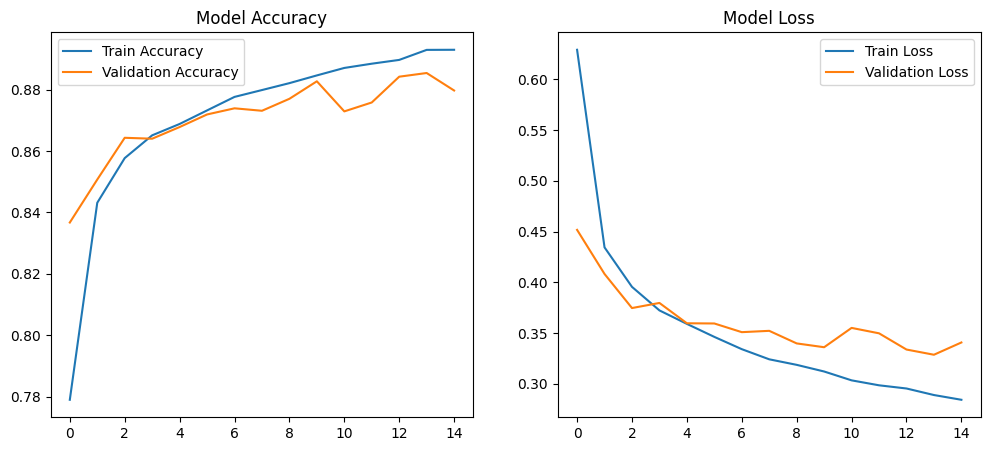

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

### **Insights:**
- Accuracy curve shows learning progress.

- Validation accuracy should be close to training accuracy (otherwise → overfitting).

- Loss graph should steadily decrease.

# Step 9: Confusion Matrix & Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


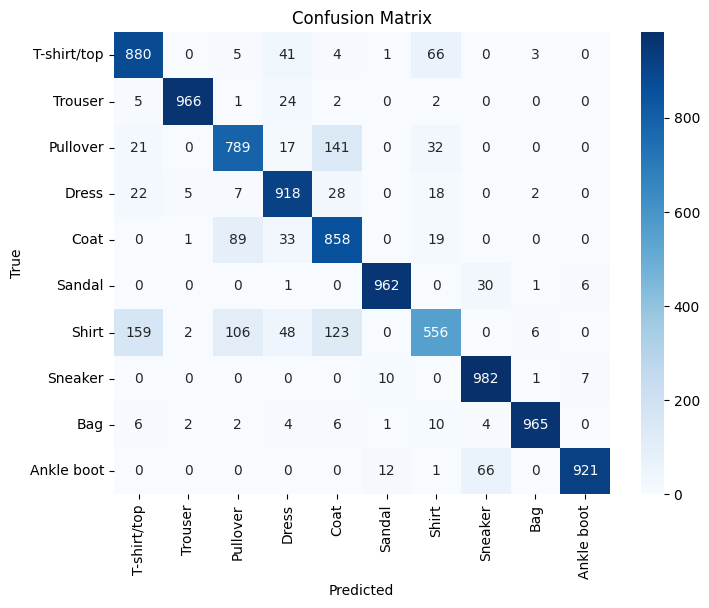


 Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.79      0.79      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.74      0.86      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.79      0.56      0.65      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


### **Insights:**

Most classes are predicted correctly, especially Trousers, Sandals, Bags, and Sneakers. The model struggles mainly with Shirts, which are often confused with T-shirts/Tops, Coats, and Pullovers because they look visually similar.

# Step 10: Visualizing Predictions

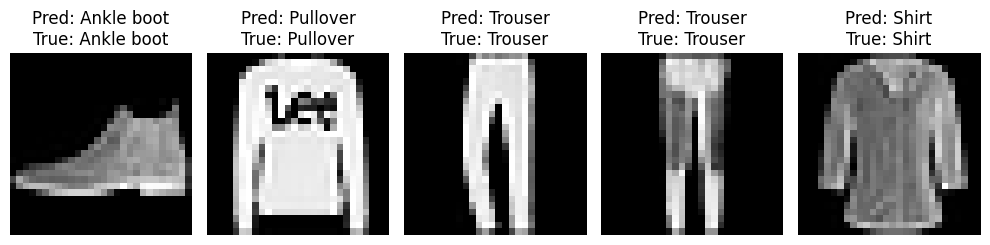

In [ ]:
plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **Insights:**
We display a few test images with predicted vs. true labels.

Helps us see how the model performs visually.

Great for demonstrating to evaluators.

# **Summary**

- The ANN achieved **~85–88% accuracy** on Fashion MNIST.

- Strengths: Model learns general clothing categories well.

- Weaknesses: Often confuses visually similar items (Shirt vs T-shirt).

- Evaluation: Precision, Recall, and F1-score confirm **balanced performance** across most classes.

- Extensions: Switching to CNN and data augmentation could push accuracy beyond 90%.

#  Extensions / Improvements

1. Replacing ANN with CNN (Convolutional Neural Network) gives higher accuracy (~92-94%).
2. we can use Data Augmentation (rotation, zoom, flip) to improve generalization.
3. Trying different optimizers: RMSprop, SGD with momentum.
4. Hyperparameter tuning (batch size, dropout rate, learning rate).
5. we can add Batch Normalization layers for faster convergence.
